In [6]:
import math

c_dict = {
    4: 64,
    6: 24
}

cidr_max = {
    4: 28,
    6: 48
}

def __get_min_samples(ip_version, mask):

    c= c_dict[ip_version]

    
    if ip_version == 4:
        ipv_max = 32
        min_samples=int(c * math.sqrt( math.pow(2, (ipv_max - mask))))
    elif ip_version == 6:
        ipv_max = 64
        min_samples=int(c * math.sqrt(math.sqrt( math.pow(2, (ipv_max - mask)))))
    else:
        pass

    # TODO für später
    

    # bei v6 doppelte wurzel

    # self.logger.info(f"min samples: {min_samples}")
    return min_samples

for i in range(0, cidr_max[4]):
    print(f"4 {i}:\t{__get_min_samples(6,i)}")

for i in range(0, cidr_max[6]):
    print(f"6 {i}:\t{__get_min_samples(6,i)}")

4 0:	1572864
4 1:	1322615
4 2:	1112182
4 3:	935230
4 4:	786432
4 5:	661307
4 6:	556091
4 7:	467615
4 8:	393216
4 9:	330653
4 10:	278045
4 11:	233807
4 12:	196608
4 13:	165326
4 14:	139022
4 15:	116903
4 16:	98304
4 17:	82663
4 18:	69511
4 19:	58451
4 20:	49152
4 21:	41331
4 22:	34755
4 23:	29225
4 24:	24576
4 25:	20665
4 26:	17377
4 27:	14612
6 0:	1572864
6 1:	1322615
6 2:	1112182
6 3:	935230
6 4:	786432
6 5:	661307
6 6:	556091
6 7:	467615
6 8:	393216
6 9:	330653
6 10:	278045
6 11:	233807
6 12:	196608
6 13:	165326
6 14:	139022
6 15:	116903
6 16:	98304
6 17:	82663
6 18:	69511
6 19:	58451
6 20:	49152
6 21:	41331
6 22:	34755
6 23:	29225
6 24:	24576
6 25:	20665
6 26:	17377
6 27:	14612
6 28:	12288
6 29:	10332
6 30:	8688
6 31:	7306
6 32:	6144
6 33:	5166
6 34:	4344
6 35:	3653
6 36:	3072
6 37:	2583
6 38:	2172
6 39:	1826
6 40:	1536
6 41:	1291
6 42:	1086
6 43:	913
6 44:	768
6 45:	645
6 46:	543
6 47:	456


In [3]:
from netaddr import IPNetwork, IPAddress

def join_siblings(ip_version, mask, prange):

    ## check if join would be possible
    if mask == 0:
        print("        join siblings not possible - we are at the root of the tree")
        return None


    nw = IPNetwork(f"{prange}/{mask}")


    #### GET SUPERNET
    nw_supernet=nw.supernet(mask-1)[0]
    supernet_ip=str(nw_supernet).split("/")[0]
    supernet_mask=int(str(nw_supernet).split("/")[1])

    siblings=list(nw_supernet.subnet(mask))
    print(f" {nw_supernet}")
    print(siblings)

join_siblings(6,48,"::" )

[IPNetwork('::/48'), IPNetwork('0:0:1::/48')]


currently 1558 minutes done
IPD run: avg: 33.32413350449294s; min: 0; max: 93
iteration run: avg: 131.05905006418485s; min: 10s; max: 230s


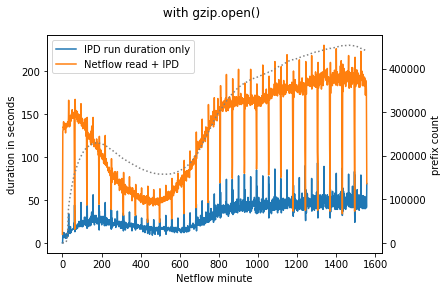

In [10]:
import datetime
import matplotlib.pyplot as plt

#logfile="/home/mehneste/ipd_algo/log/q0.95_c64-24_cidr_max28-48_t60_e120_decaydefault.log" # read rb
logfile="/home/mehneste/ipd_algo/log/q0.95_c64-24_cidr_max28-48_t60_e120_decaydefault.log" # read rt 


### data stuff

format = "%Y-%m-%d %H:%M:%S,%f"

file = open(logfile, 'r')
Lines = file.readlines()

count=0
last_start_ts=None
start_ts=None
end_ts=None

ipd_run_list=[]
iteration_run_list=[]
prefix_list=[]
for line in Lines:
    count += 1
    # print("Line{}: {}".format(count, line.strip()))
    x = line.split(" ")

    ts=datetime.datetime.strptime(f"{x[0]} {x[1]}", format)
    #print(ts)
    if last_start_ts == None:   last_start_ts = ts
    if "run IPD" in line:
        start_ts=ts

        try:
            prefix_list.append(int(x[-2]))
        except:
            pass

        if last_start_ts != start_ts:
            iteration_duration= start_ts- last_start_ts
            iteration_run_list.append(iteration_duration.seconds)
            last_start_ts = start_ts
        
    elif "Finished" in line:
        end_ts=ts
        duration = end_ts - start_ts
        ipd_run_list.append(duration.seconds)

## plotting stuff

fig,ax = plt.subplots()
ax.plot(ipd_run_list, label="IPD run duration only")
ax.plot(iteration_run_list, label="Netflow read + IPD")


ax.set_xlabel("Netflow minute")
ax.set_ylabel("duration in seconds")
plt.legend()

ax2=ax.twinx()
ax2.plot(prefix_list, label="prefix count", linestyle="dotted", color="grey")
ax2.set_ylabel("prefix count")



plt.suptitle(" with gzip.open()")
print(f"currently {len(iteration_run_list)} minutes done")
print(f"IPD run: avg: {sum(ipd_run_list) / len(ipd_run_list)}s; min: {min(ipd_run_list)}; max: {max(ipd_run_list)}")
print(f"iteration run: avg: {sum(iteration_run_list) / len(iteration_run_list)}s; min: {min(iteration_run_list)}s; max: {max(iteration_run_list)}s")




currently 1558 minutes done
IPD run: avg: 52.640564826700896s; min: 0; max: 122
iteration run: avg: 109.88254172015404s; min: 5s; max: 206s


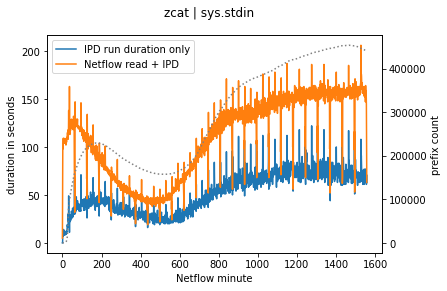

In [11]:
import datetime
from sys import prefix
import matplotlib.pyplot as plt

logfile="/home/mehneste/ipd_algo/log_stdin/q0.95_c64-24_cidr_max28-48_t60_e120_decaydefault.log" # read rb
#logfile="/home/mehneste/ipd_algo/log_rt/q0.95_c64-24_cidr_max28-48_t60_e120_decaydefault.log" # read rt 


### data stuff

format = "%Y-%m-%d %H:%M:%S,%f"

file = open(logfile, 'r')
Lines = file.readlines()

count=0
last_start_ts=None
start_ts=None
end_ts=None

ipd_run_list=[]
iteration_run_list=[]
prefix_list=[]
for line in Lines:
    count += 1
    # print("Line{}: {}".format(count, line.strip()))
    x = line.split(" ")

    ts=datetime.datetime.strptime(f"{x[0]} {x[1]}", format)
    #print(ts)
    if last_start_ts == None:   last_start_ts = ts
    if "run IPD" in line:
        start_ts=ts
        try:
            prefix_list.append(int(x[-2]))
        except:
            pass
        if last_start_ts != start_ts:
            iteration_duration= start_ts- last_start_ts
            iteration_run_list.append(iteration_duration.seconds)
            last_start_ts = start_ts
        
    elif "Finished" in line:
        end_ts=ts
        duration = end_ts - start_ts
        ipd_run_list.append(duration.seconds)

## plotting stuff

fig,ax = plt.subplots()
ax.plot(ipd_run_list, label="IPD run duration only")
ax.plot(iteration_run_list, label="Netflow read + IPD")


ax.set_xlabel("Netflow minute")
ax.set_ylabel("duration in seconds")
plt.legend()

ax2=ax.twinx()
ax2.plot(prefix_list, label="prefix count", linestyle="dotted", color="grey")
ax2.set_ylabel("prefix count")


plt.suptitle("zcat | sys.stdin")

print(f"currently {len(iteration_run_list)} minutes done")
print(f"IPD run: avg: {sum(ipd_run_list) / len(ipd_run_list)}s; min: {min(ipd_run_list)}; max: {max(ipd_run_list)}")
print(f"iteration run: avg: {sum(iteration_run_list) / len(iteration_run_list)}s; min: {min(iteration_run_list)}s; max: {max(iteration_run_list)}s")


currently 1029.0 minutes done
IPD run: avg: 63.76384839650146s; min: 0; max: 173
iteration run: avg: 116.3245869776482s; min: 5s; max: 239s


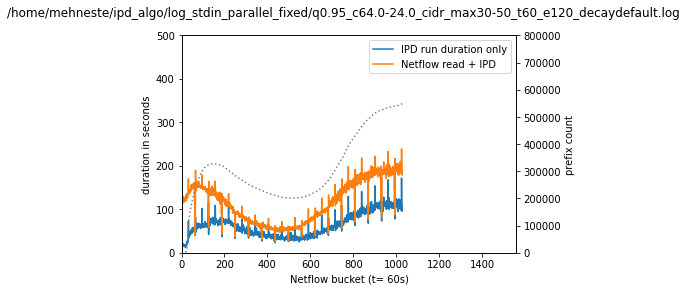

currently 890.0 minutes done
IPD run: avg: 101.74494382022472s; min: 0; max: 230
iteration run: avg: 134.58539325842696s; min: 5s; max: 275s


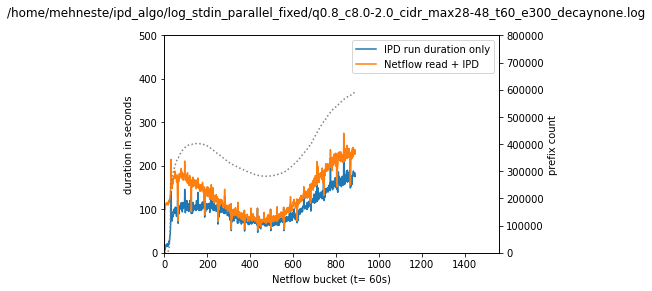

currently 915.5 minutes done
IPD run: avg: 36.37882096069869s; min: 0; max: 103
iteration run: avg: 54.55379574003277s; min: 0s; max: 127s


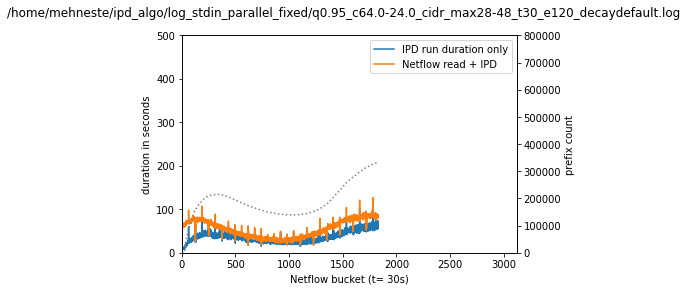

currently 1226.0 minutes done
IPD run: avg: 40.26101141924959s; min: 0; max: 105
iteration run: avg: 97.5326264274062s; min: 5s; max: 191s


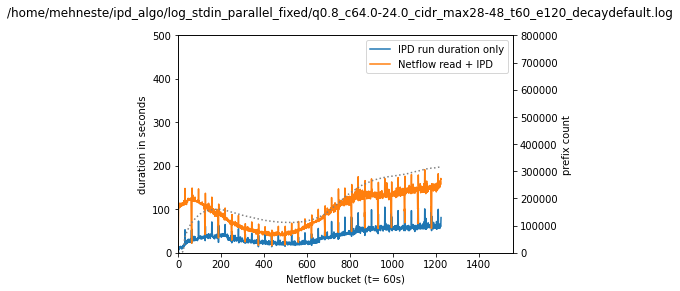

currently 1182.0 minutes done
IPD run: avg: 60.94932432432432s; min: 0; max: 163
iteration run: avg: 169.8663282571912s; min: 37s; max: 318s


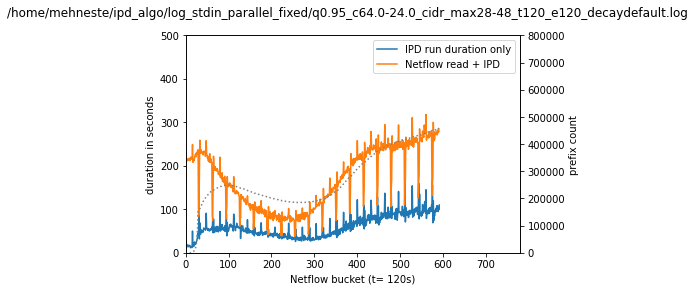

currently 1265.0 minutes done
IPD run: avg: 33.76145339652449s; min: 0; max: 100
iteration run: avg: 94.49407114624506s; min: 5s; max: 191s


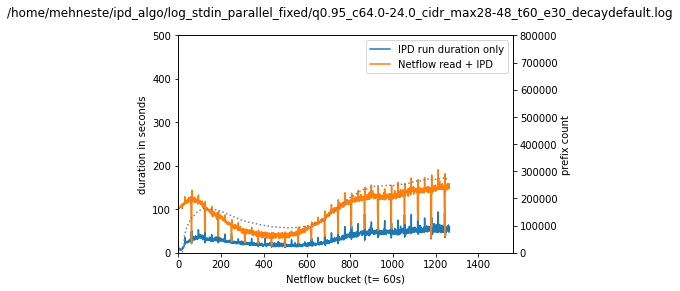

currently 1198.0 minutes done
IPD run: avg: 46.293577981651374s; min: 0; max: 120
iteration run: avg: 99.75208681135226s; min: 5s; max: 195s


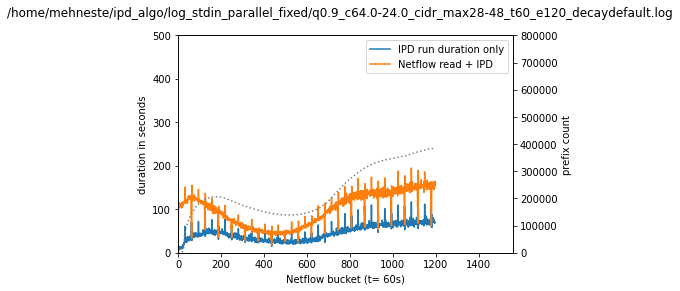

currently 927.5 minutes done
IPD run: avg: 32.5822102425876s; min: 0; max: 84
iteration run: avg: 53.86900269541779s; min: 0s; max: 118s


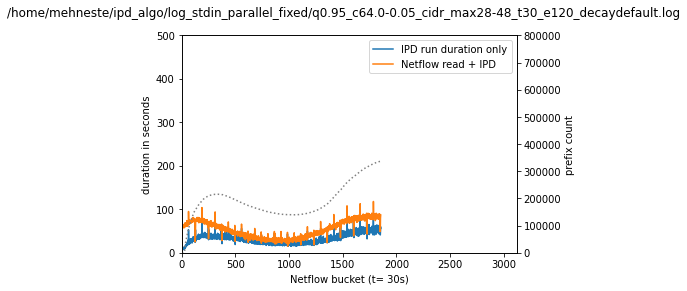

currently 1050.0 minutes done
IPD run: avg: 44.70409134157945s; min: 0; max: 129
iteration run: avg: 95.42666666666666s; min: 5s; max: 197s


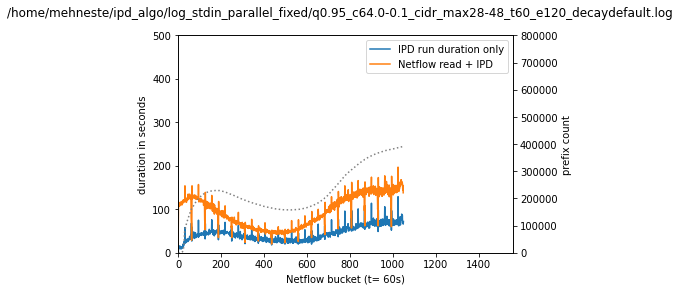

currently 1395.0 minutes done
IPD run: avg: 26.096704871060172s; min: 0; max: 66
iteration run: avg: 85.66164874551971s; min: 5s; max: 152s


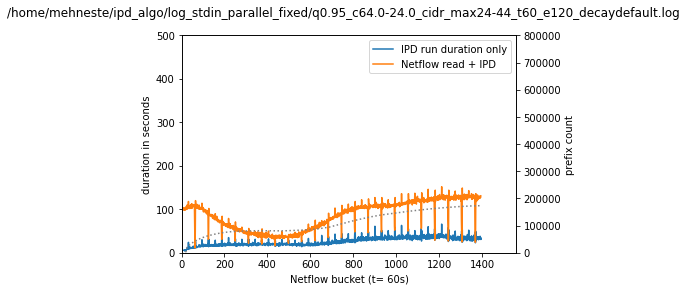

currently 746.0 minutes done
IPD run: avg: 134.4048257372654s; min: 0; max: 266
iteration run: avg: 160.43565683646113s; min: 5s; max: 277s


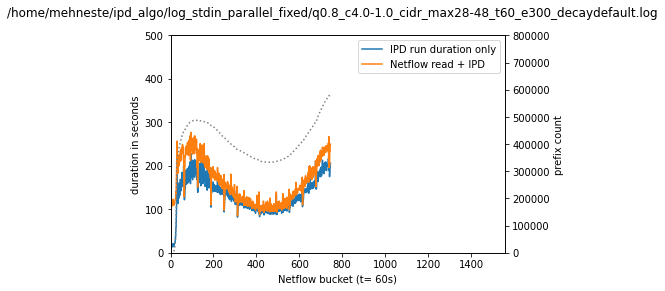

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [1]:
import datetime
from sys import prefix
import matplotlib.pyplot as plt
import  glob
import numpy as np



### data stuff

format = "%Y-%m-%d %H:%M:%S,%f"

for logfile in glob.glob("/home/mehneste/ipd_algo/log_stdin_parallel_fixed/*"):
    file = open(logfile, 'r')
    Lines = file.readlines()

    count=0
    last_start_ts=None
    start_ts=None
    end_ts=None

    ipd_run_list=[]
    iteration_run_list=[]
    prefix_list=[]
    for line in Lines:
        count += 1
        # print("Line{}: {}".format(count, line.strip()))
        x = line.split(" ")

        ts=datetime.datetime.strptime(f"{x[0]} {x[1]}", format)
        #print(ts)
        if last_start_ts == None:   last_start_ts = ts
        if "run IPD" in line:
            start_ts=ts
            try:
                prefix_list.append(int(x[-2]))
            except:
                pass

            if last_start_ts != start_ts:
                iteration_duration= start_ts- last_start_ts
                if int(iteration_duration.seconds) > 600:
                    #print(x)
                    print(f"Caution: {last_start_ts} -> {start_ts}: netflow ts: {int(x[-5])} iteration run took extremly long: {iteration_duration}")
                iteration_run_list.append(iteration_duration.seconds)
                last_start_ts = start_ts
            
        elif "Finished" in line:
            end_ts=ts
            duration = end_ts - start_ts
            ipd_run_list.append(duration.seconds)

    ## plotting stuff
    # get t
    t = int(logfile.split("_t")[1].split("_e")[0])/60
    

    fig,ax = plt.subplots()
    ax.plot(ipd_run_list, label="IPD run duration only")
    ax.plot(iteration_run_list, label="Netflow read + IPD")
    # ax.set_xticklabels(np.arange(0, 1560, t))

    ax.set_xlabel(f"Netflow bucket (t= {int(t*60)}s)")
    ax.set_ylabel("duration in seconds")
    ax.set_ylim(0, 500)
    ax.set_xlim(0, 1560/t)
    
    plt.legend()

    ax2=ax.twinx()
    ax2.plot(prefix_list, label="prefix count", linestyle="dotted", color="grey")
    ax2.set_ylabel("prefix count")
    ax2.set_ylim(0, 800000)


    plt.suptitle(f"{logfile}")

    print(f"currently {len(iteration_run_list)*t} minutes done")
    print(f"IPD run: avg: {sum(ipd_run_list) / len(ipd_run_list)}s; min: {min(ipd_run_list)}; max: {max(ipd_run_list)}")
    print(f"iteration run: avg: {sum(iteration_run_list) / len(iteration_run_list)}s; min: {min(iteration_run_list)}s; max: {max(iteration_run_list)}s")
    plt.show()
